In [264]:
import numpy as np
import matplotlib.pyplot as plt

In [265]:
from matplotlib.colors import ListedColormap

In [266]:
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [267]:
from sklearn.model_selection import train_test_split

In [268]:
class AdaLineGD:
    def __init__(self, eta=0.01, n_iter=100, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0,scale=0.01, size= 1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = y - output
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2

            self.cost_.append(cost)

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0] # w_[0] нейрон смещения
    def activation(self, X):
        return X
        return 1.0 / (1.0 + np.exp(-X))
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)

In [269]:
X = np.array([
    [0,0,0],
    [0,0,1],
    [0,1,0],
    [0,1,1],
    [1,0,0],
    [1,0,1],
    [1,1,0],
    [1,1,1],
    
    [0,0,-1],
    [0,-1,0],
    [0,-1,-1],
    [-1,0,0],
    [-1,0,-1],
    [-1,-1,0],
    [-1,-1,-1],
    
])
X = np.where(X == -1, 2, X)
X = np.where(X == 0, -1, X)
y1 =  np.array([1,1,1,1, -1,-1,-1,-1,       1,1,1, -1,-1,-1,-1])

y2 = np.array([1,1, -1,-1, 1,1, -1,-1, 1,   -1,-1, 1,1, -1,-1])

y3 = np.array([1, -1, 1, -1, 1, -1, 1, -1,    -1, 1, -1, 1, -1, 1, -1])

In [270]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(
    X, y1, test_size=0.2, random_state=1, stratify=y1
)
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y2, test_size=0.2, random_state=1, stratify=y2
)
X_train3, X_test3, y_train3, y_test3 = train_test_split(
    X, y3, test_size=0.2, random_state=1, stratify=y3
)

In [271]:
ada1 = AdaLineGD(eta=0.01, n_iter=30, random_state=1)
ada2 = AdaLineGD(eta=0.01, n_iter=30, random_state=1)
ada3 = AdaLineGD(eta=0.01, n_iter=30, random_state=1)

<function matplotlib.pyplot.show>

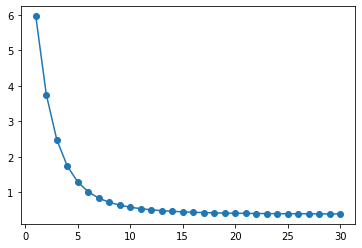

In [272]:
ada1.fit(X_train1, y_train1)

plt.plot(range(1, len(ada1.cost_)+1), ada1.cost_, marker='o')
plt.show

<function matplotlib.pyplot.show>

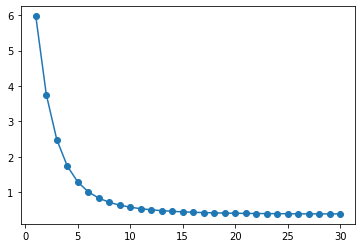

In [273]:
ada2.fit(X_train2, y_train2)

plt.plot(range(1, len(ada2.cost_)+1), ada2.cost_, marker='o')
plt.show

<function matplotlib.pyplot.show>

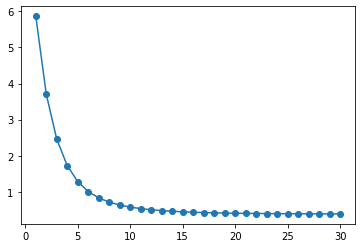

In [274]:
ada3.fit(X_train3, y_train3)

plt.plot(range(1, len(ada3.cost_)+1), ada3.cost_, marker='o')
plt.show

In [275]:
X_win = np.array([
                  [0,0,0], # -
                  [0,0,0], # -
                  [0,0,0], # -

                  [0,0,0], # -
                  [0,0,1], # -
                  [0,1,0], # -
                  [0,1,1], # +
                  [1,0,0], # -
                  [1,0,1], # +
                  [1,1,0], # +
                  
                  [0,0,-1], # -
                  [0,-1,0], # -
                  [0,-1,-1], # -
                  #[-1,0,0], # -
                  #[-1,0,-1], # -
                  [-1,-1,0], # -

                  [0,1,1], # +
                  #[1,0,1], # +
                  [1,1,0], # +
                  [0,1,1], # +
                  #[1,0,1], # +
                  [1,1,0], # +
])

X_win = np.where(X_win == -1, 10, X_win)
X_win = np.where(X_win == 0, -1, X_win)

y_win = np.array([
                  -1,-1,-1,
                  -1,-1,-1,
                  1,
                  -1,
                  1, 1, 
                 -1,-1,-1,-1,#-1,-1,
                  1, 1, 1, 1, #1, 1
                  ])

X_win.shape[0] == y_win.shape[0]

True

In [276]:
X_train_win, X_test_win, y_train_win, y_test_win = train_test_split(
    X_win, y_win, test_size=0.2, random_state=1, stratify=y_win
)

In [277]:
ada_win = AdaLineGD(eta=0.001, n_iter=100, random_state=1)

<function matplotlib.pyplot.show>

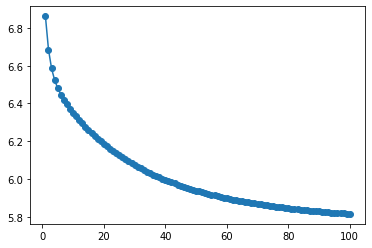

In [278]:
ada_win.fit(X_train_win, y_train_win)

plt.plot(range(1, len(ada_win.cost_)+1), ada_win.cost_, marker='o')
plt.show